# Sentiment Analysis con KNN
## Clasificador en C++ 💪💪
Vamos a probar a nuestro bichito


Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [1]:
!cd .. && git submodule init
!cd .. && git submodule update
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /mnt/c/Users/sergi/OneDrive/Escritorio/JULIA/METODOS/tp2/bin/python (found version "3.6.8") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so
-- pybind11 v2.3.dev0
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/mnt/c/Users/sergi/OneDrive/Escritori

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import sentiment


/mnt/c/Users/sergi/OneDrive/Escritorio/JULIA/METODOS/master/notebooks
Python 3.6.8


In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd

!cd ../data && tar -xvf *.tgz
!cd ../data && tar -xvf *.tar.gz

df = pd.read_csv("../data/imdb_small.csv", index_col=0)

print("Cantidad de documentos: {}".format(df.shape[0]))

tar: *.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
tar: *.tar.gz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
Cantidad de documentos: 12500


In [4]:
df.describe()

,type,review,label,file
count,12500,12500,12500,12500
unique,2,12469,2,12085
top,test,I was so looking forward to seeing this when i...,neg,5481_1.txt
freq,6275,2,6322,2


In [5]:
text_train = (df[df.type == 'train']["review"])[:1000]
label_train = (df[df.type == 'train']["label"])[:1000]

text_test = (df[df.type == 'test']["review"])[:500]
label_test = (df[df.type == 'test']["label"])[:500]

print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
print("Cantidad de instancias de test = {}".format(len(text_test)))


Cantidad de instancias de entrenamiento = 1000
Cantidad de instancias de test = 500


In [6]:
print("Class balance : {} pos {} neg".format(
    (label_train == 'pos').sum() / label_train.shape[0], 
    (label_train == 'neg').sum() / label_train.shape[0]
))

Class balance : 0.512 pos 0.488 neg


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)

vectorizer.fit(text_train)

X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values

In [8]:
import sentiment

clf = sentiment.KNNClassifier(100)

clf.fit(X_train, y_train)


In [9]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.572
CPU times: user 14.2 s, sys: 25.8 s, total: 40 s
Wall time: 44.5 s


In [10]:
# Probando la nueva funcion "predictNewK" 
#%%time
print(clf.vecinos())
y_pred = clf.predictNewK(75)
print(y_pred.shape)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(acc))

100
(500,)
Accuracy: 0.566


In [11]:
#Imports para los tests
import matplotlib.pyplot as plt
import sentiment
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
df = pd.read_csv("../data/imdb_small.csv", index_col=0)

In [12]:
# Funcion para randomizar un dataset
def randomizarBase(df):
    df = df.sample(frac=1)
    return df

In [1]:
#TEST UMBRALES BOLSA DE PALABRAS

#Usamos los k y alpha que optimizaban knn y pca
k = #
alpha = #
vec_border = list(range(0,5,1))    #cantidad de umbrales de vectorizer a testear. Mientras más grande el i se achica más la bolsa

import pandas as pd
from sklearn.metrics import accuracy_score
df = pd.read_csv("../data/imdb_small.csv", index_col=0)

from sklearn.feature_extraction.text import CountVectorizer
from sentiment import PCA, KNNClassifier, get_first_eigenvalues
import numpy as np
import scipy
import matplotlib.pyplot as plt
borde = 9375
text_train = df[:borde]["review"]
label_train = df[:borde]["label"]

text_test = df[borde:]["review"]
label_test = df[borde:]["label"]

print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
print("Cantidad de instancias de test = {}".format(len(text_test)))


min_max = []
acc = []
ejex = []
pruebas=[]

for i in vec_border:
    vectorizer = CountVectorizer(max_df=1.0-i*0.05, min_df=0.0+i*0.01, max_features=5000)  #el inferior filtra de a más q el superior
    vectorizer.fit(text_train)
    X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
    X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values
    
    pca = PCA(alpha)
    print("Alpha {}".format(alpha))
    print("Entrenando PCA")

    #print(type(X_train))
    pca.fit(X_train.toarray())
    #print(type(X_train))
    X_pca_train = pca.transform(X_train)
    #print(type(X_train))
    X_pca_test = pca.transform(X_test)
    
    ## Creo y entreno
    clf = KNNClassifier(k)
    clf.fit(X_pca_train, y_train)

    # Predigo
    y_pred = clf.predict(X_pca_test)

    # Me fijo el accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    print(acc)
    #print("k = {} alpha = {} ----> {}".format(k, alpha, accuracy))

    min_max.append((round(0.0+i*0.005,2),round(1.0-i*0.05,2)))
    ejex.append(0.0+i*0.005)
    pruebas.append({
        "max_df": 1.0-i*0.05,
        "min_df": 0.0+i*0.005,
        "acc": acc,
    })

print("ejex: {}".format(ejex))
print("min_max: {}".format(min_max))
fig=plt.figure(figsize=(10, 8), dpi=80)
plt.plot(ejex, acc, '-o')
#plt.legend(Umbrales, loc='upper left')   #Cuadradito que indica q representa cada linea
plt.xlabel("Umbrales")
plt.ylabel("Accuracy")
plt.xticks(ticks=ejex, labels=min_max)
plt.title("Performance de clasificador en función a umbrales de la bolsa de palabras");

SyntaxError: invalid syntax (<ipython-input-1-fa2188a4c4ac>, line 4)

In [ ]:
# TEST DE CAMBIO DE N_NEIGHBORS Y ALPHA 
# (es decir, el de Rodri)

#SACAR ESTOS IMPORTS Y HACER Q ANDEN CON LOS DE ARRIBA
import pandas as pd
from sklearn.metrics import accuracy_score
df = pd.read_csv("../data/imdb_small.csv", index_col=0)

from sklearn.feature_extraction.text import CountVectorizer
from sentiment import PCA, KNNClassifier, get_first_eigenvalues
import numpy as np
import scipy
import matplotlib.pyplot as plt

# CAMBIAR 6225 POR 3125 (AMI) Y 9375 (JULI)
borde = 9375
df=randomizarBase(df)    # Desordenamos la base para que las distintas divisiones de train no tengan siempre los mismos primeros elementos
text_train = df[:borde]["review"]
label_train = df[:borde]["label"]
text_test = df[borde:]["review"]
label_test = df[borde:]["label"]

print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
print("Cantidad de instancias de test = {}".format(len(text_test)))

vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)    # CAMBIAR SI HACE FALTA !!!!!!!!!!!!!!!!!!!!!
vectorizer.fit(text_train)
X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values

# Resultados en una lista por si hace falta
pruebas = []

alphas = [20]
knns = [10]
#alphas = list(range(10, 101, 10))
#knns = list(range(10,201,10))
knns.reverse()
alphas.reverse()

pca = PCA(alphas[0])
pca.fit(X_train.toarray())

for alpha in alphas:
    print("Alpha {}".format(alpha))
    print("Entrenando PCA")
    pca.newAlpha(alpha)
    
    #print(type(X_train))
    X_pca_train = pca.transform(X_train)
    #print(type(X_train))
    X_pca_test = pca.transform(X_test)
    acc = []
    
    ## Aplico KNN: creo y entreno para el k más grande
    print("Para {} vecinos".format(knns[0]))
    clf = KNNClassifier(knns[0])
    clf.fit(X_pca_train.toarray(), y_train)
    # Predigo para el mayor k
    y_pred = clf.predict(X_pca_test)
    # Me fijo el accuracy
    acc.append(accuracy_score(y_test, y_pred))
    print(acc)
    pruebas.append({
        "k": knns[0],
        "alpha": alpha,
        "acc": acc,
    })
    for k in knns[1:]:
        print("Para {} vecinos".format(k))        
        print("Predigo...")
        #Predigo para menor cantidad de vecinos
        y_pred = clf.predictNewK(k)
        #Calculo accuracy y guardo resultado
        acc.append(accuracy_score(y_test, y_pred))
        print("Accuracy: {}".format(acc))
        pruebas.append({
        "k": k,
        "alpha": alpha,
        "acc": acc,
        })
        
    plt.plot(knns, acc, '-o')
    print(acc)

plt.legend(alphas, loc='upper left')
plt.xlabel("Vecinos")
plt.ylabel("Accuracy")
plt.xticks(knns)
plt.title("Performance de clasificador en función a cantidad de vecinos y alpha");

Cantidad de instancias de entrenamiento = 9375
Cantidad de instancias de test = 3125


Analizando n=3125
Reordenando base y dividiendo...
Cantidad de instancias de entrenamiento = 3125
Cantidad de instancias de test = 9375
Vectorizando...
Para 200 vecinos
Hago fit...
Predigo...
(9375, 1813)
Accuracy: [0.6548266666666667]
Para 190 vecinos
Predigo...
Accuracy: [0.6548266666666667, 0.65664]
Para 180 vecinos
Predigo...
Accuracy: [0.6548266666666667, 0.65664, 0.6541866666666667]
Para 170 vecinos
Predigo...
Accuracy: [0.6548266666666667, 0.65664, 0.6541866666666667, 0.6526933333333333]
Para 160 vecinos
Predigo...
Accuracy: [0.6548266666666667, 0.65664, 0.6541866666666667, 0.6526933333333333, 0.6536533333333333]
Para 150 vecinos
Predigo...
Accuracy: [0.6548266666666667, 0.65664, 0.6541866666666667, 0.6526933333333333, 0.6536533333333333, 0.6593066666666667]
Para 140 vecinos
Predigo...
Accuracy: [0.6548266666666667, 0.65664, 0.6541866666666667, 0.6526933333333333, 0.6536533333333333, 0.6593066666666667, 0.65632]
Para 130 vecinos
Predigo...
Accuracy: [0.6548266666666667, 0.65664,

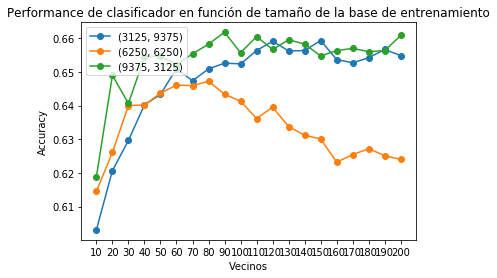

In [13]:
# TEST DE TAMAÑO DE INSTANCIAS DE ENTRENAMIENTO vs TEST CON KNN VARIABLE
import sentiment
res1 = []
division = list(range(3125,12500,3125)) #1/4, 1/2, 3/4 de la base se usan para train
rangos = [(x,12500-x) for x in division]
knns = list(range(10,201,10))
knns.reverse()

for n in division:
    print("Analizando n={}".format(n))
    acc = []
    
    #Divido train y test
    print("Reordenando base y dividiendo...")
    df=randomizarBase(df)    # Desordenamos la base para que las distintas divisiones de train no tengan siempre los mismos primeros elementos
    text_train = df[:n]["review"] #:n
    label_train = df[:n]["label"] 
    text_test = df[n:]["review"] #n:
    label_test = df[n:]["label"]
    print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
    print("Cantidad de instancias de test = {}".format(len(text_test)))
    #Hago BoW
    print("Vectorizando...")
    vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)
    vectorizer.fit(text_train)
    X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
    X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values

    #Aplico KNN
    print("Para {} vecinos".format(knns[0]))        
    clf = sentiment.KNNClassifier(knns[0])
    print("Hago fit...")
    clf.fit(X_train, y_train)
    #Predigo
    print("Predigo...")
    print(X_test.shape)
    y_pred = clf.predict(X_test)
    #Calculo accuracy y guardo resultado
    acc.append(accuracy_score(y_test, y_pred))
    
    print("Accuracy: {}".format(acc))
    for k in knns[1:]:
        print("Para {} vecinos".format(k))        
        #Predigo
        print("Predigo...")
        y_pred = clf.predictNewK(k)
        #Calculo accuracy y guardo resultado
        acc.append(accuracy_score(y_test, y_pred))
        print("Accuracy: {}".format(acc))
    plt.plot(knns, acc, '-o')

plt.legend(rangos, loc='upper left')
plt.xlabel("Vecinos")
plt.ylabel("Accuracy")
plt.xticks(knns)
plt.title("Performance de clasificador en función de tamaño de la base de entrenamiento");

In [ ]:
# TEST DE LAS NORMAS
borde = #
df=randomizarBase(df)    # Desordenamos la base para que las distintas divisiones de train no tengan siempre los mismos primeros elementos
text_train = df[:borde]["review"]
label_train = df[:borde]["label"]
text_test = df[borde:]["review"]
label_test = df[borde:]["label"]

print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
print("Cantidad de instancias de test = {}".format(len(text_test)))

norma = # "" #string

vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)    # CAMBIAR SI HACE FALTA !!!!!!!!!!!!!!!!!!!!!
vectorizer.fit(text_train)
X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values

# Resultados en una lista por si hace falta
pruebas = []

alpha = #
k = #

pca = PCA(alpha)
pca.fit(X_train.toarray())

print("Alpha {}".format(alpha))
print("Entrenando PCA")
pca.newAlpha(alpha)

X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)
acc = []

## Aplico KNN
print("Para {} vecinos".format(knns[0]))
clf = KNNClassifier(knns[0])
clf.fit(X_pca_train, y_train)
# Predigo para el mayor k
y_pred = clf.predict(X_pca_test)
# Me fijo el accuracy
acc.append(accuracy_score(y_test, y_pred))
print(acc)
pruebas.append({
    "k": knns[0],
    "alpha": alpha,
    "acc": acc,
})

#plt.plot(knns, acc, '-o')
print(acc)

# VER QUE TIPO DE GRAFICO USAR!!! 
#plt.legend(alphas, loc='upper left')
plt.xlabel("Vecinos")
plt.ylabel("Accuracy")
#plt.xticks(knns)
plt.title("Performance de clasificador en función a la norma. Norma " + norma);

Analizando n=3125
Reordenando base y dividiendo...
Cantidad de instancias de entrenamiento = 3125
Cantidad de instancias de test = 9375
Vectorizando...
Alpha 100
Entrenando PCA
Para 200 vecinos
Hago fit...
Predigo...
Accuracy: [0.6689066666666666]
Para 190 vecinos
Predigo...
Accuracy: [0.6689066666666666, 0.6705066666666667]
Para 180 vecinos
Predigo...
Accuracy: [0.6689066666666666, 0.6705066666666667, 0.6721066666666666]
Para 170 vecinos
Predigo...
Accuracy: [0.6689066666666666, 0.6705066666666667, 0.6721066666666666, 0.67424]
Para 160 vecinos
Predigo...
Accuracy: [0.6689066666666666, 0.6705066666666667, 0.6721066666666666, 0.67424, 0.672]
Para 150 vecinos
Predigo...
Accuracy: [0.6689066666666666, 0.6705066666666667, 0.6721066666666666, 0.67424, 0.672, 0.67168]
Para 140 vecinos
Predigo...
Accuracy: [0.6689066666666666, 0.6705066666666667, 0.6721066666666666, 0.67424, 0.672, 0.67168, 0.6747733333333333]
Para 130 vecinos
Predigo...
Accuracy: [0.6689066666666666, 0.6705066666666667, 0.67

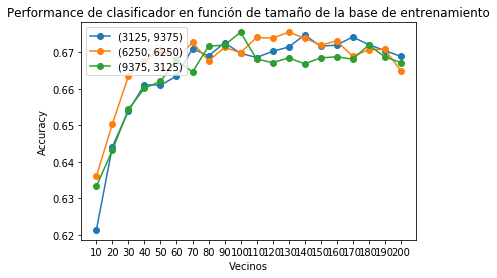

In [14]:
# TEST DE TAMAÑO DE INSTANCIAS DE ENTRENAMIENTO vs TEST CON KNN VARIABLE + PCA
import sentiment
from sentiment import PCA
res1 = []
division = list(range(3125,12500,3125)) #1/4, 1/2, 3/4 de la base se usan para train
rangos = [(x,12500-x) for x in division]
knns = list(range(10,201,10))
knns.reverse()
alpha = 100

for n in division:
    print("Analizando n={}".format(n))
    acc = []
    
    #Divido train y test
    print("Reordenando base y dividiendo...")
    df=randomizarBase(df)    # Desordenamos la base para que las distintas divisiones de train no tengan siempre los mismos primeros elementos
    text_train = df[:n]["review"] #:n
    label_train = df[:n]["label"] 
    text_test = df[n:]["review"] #n:
    label_test = df[n:]["label"]
    print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
    print("Cantidad de instancias de test = {}".format(len(text_test)))
    #Hago BoW
    print("Vectorizando...")
    vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)
    vectorizer.fit(text_train)
    X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
    X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values
    
    print("Alpha {}".format(alpha))
    print("Entrenando PCA")
    #pca.newAlpha(alpha)
    pca = PCA(alpha)
    pca.fit(X_train.toarray())

    X_pca_train = pca.transform(X_train)
    X_pca_test = pca.transform(X_test)

    #Aplico KNN
    print("Para {} vecinos".format(knns[0]))        
    clf = sentiment.KNNClassifier(knns[0])
    print("Hago fit...")
    clf.fit(X_pca_train, y_train)
    #Predigo
    print("Predigo...")
    #print(X_test.shape)
    y_pred = clf.predict(X_pca_test)
    #Calculo accuracy y guardo resultado
    acc.append(accuracy_score(y_test, y_pred))
    
    print("Accuracy: {}".format(acc))
    for k in knns[1:]:
        print("Para {} vecinos".format(k))        
        #Predigo
        print("Predigo...")
        y_pred = clf.predictNewK(k)
        #Calculo accuracy y guardo resultado
        acc.append(accuracy_score(y_test, y_pred))
        print("Accuracy: {}".format(acc))
    plt.plot(knns, acc, '-o')

plt.legend(rangos, loc='upper left')
plt.xlabel("Vecinos")
plt.ylabel("Accuracy")
plt.xticks(knns)
plt.title("Performance de clasificador en función de tamaño de la base de entrenamiento");